In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf

In [2]:
# 讀取先前用numpy生成的漲跌福資料
stock_day_change = np.load("data/stock_day_change.npy")

# 轉換成df然後用head看前3筆
pd.DataFrame(stock_day_change).head(3)

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,-0.784420,-1.264898,0.034561,0.109280,-0.902071,-0.081563,-0.898580,0.682568,0.051846,1.270434,...,0.129683,-0.091142,-0.484135,-1.104941,0.616782,-1.475809,0.257111,1.520519,-0.219772,0.328357
1,-0.872842,-0.107524,0.510091,-0.185354,-0.920097,0.342611,1.105107,-0.889266,1.530851,-0.929034,...,0.351611,1.207422,-1.407861,2.849425,1.003486,1.080233,-0.044715,-0.150328,-0.204824,0.718530
2,-0.851631,-0.345129,0.585124,0.548832,0.510381,-0.090978,0.808159,1.380791,1.135778,0.160518,...,-1.860583,-1.021725,0.923887,-0.083101,0.432830,0.801225,-0.718594,0.735712,1.289562,-0.181882


In [3]:
# 給df有意義的index
stock_symbols = ["股票"+str(x) for x in range(stock_day_change.shape[0])]
days = pd.date_range('2020-01-01', periods=stock_day_change.shape[1], freq='D')
df = pd.DataFrame(stock_day_change, index=stock_symbols, columns=days)
df.head(3)


,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18
股票0,-0.784420,-1.264898,0.034561,0.109280,-0.902071,-0.081563,-0.898580,0.682568,0.051846,1.270434,...,0.129683,-0.091142,-0.484135,-1.104941,0.616782,-1.475809,0.257111,1.520519,-0.219772,0.328357
股票1,-0.872842,-0.107524,0.510091,-0.185354,-0.920097,0.342611,1.105107,-0.889266,1.530851,-0.929034,...,0.351611,1.207422,-1.407861,2.849425,1.003486,1.080233,-0.044715,-0.150328,-0.204824,0.718530
股票2,-0.851631,-0.345129,0.585124,0.548832,0.510381,-0.090978,0.808159,1.380791,1.135778,0.160518,...,-1.860583,-1.021725,0.923887,-0.083101,0.432830,0.801225,-0.718594,0.735712,1.289562,-0.181882


In [4]:
# 轉置、以n天為週期重塑，resample需index是時間
p = 21
df = df.T
df_p = df.resample(f"{p}D").mean()
df_p.head()

,股票0,股票1,股票2,股票3,股票4,股票5,股票6,股票7,股票8,股票9,...,股票190,股票191,股票192,股票193,股票194,股票195,股票196,股票197,股票198,股票199
2020-01-01,-0.220615,-0.210615,0.131126,0.307044,0.427985,-0.052244,0.087456,0.081539,-0.006156,0.346763,...,-0.012041,-0.006890,-0.140947,0.334162,0.001738,0.118481,0.001176,0.084982,-0.170866,-0.071209
2020-01-22,-0.184092,0.126449,0.152349,-0.058927,-0.301951,0.101589,-0.161558,-0.151482,0.224477,0.219262,...,0.165084,-0.040963,-0.362581,-0.421000,-0.061922,0.055022,0.155408,0.185140,0.042835,0.075881
2020-02-12,-0.232359,-0.197019,0.085865,-0.125385,0.550963,0.099133,0.079325,0.162575,-0.144673,-0.084320,...,-0.090429,0.312264,0.198031,0.076394,-0.147947,0.261874,0.252736,-0.263591,-0.061446,0.055045
2020-03-04,0.001133,-0.023343,-0.022373,0.055652,-0.152683,0.114016,0.447207,0.204071,-0.244113,0.462079,...,0.237527,0.126108,0.006303,-0.088501,-0.359742,-0.358321,-0.540411,-0.229046,0.198211,0.221646
2020-03-25,0.142192,-0.042756,-0.077662,-0.284535,0.233777,-0.221828,0.327586,0.346551,0.455289,-0.108714,...,0.043025,-0.135551,-0.372527,0.051458,0.345383,-0.293637,0.296435,-0.242916,-0.148301,-0.255009


In [5]:
# Series
df_stock0 = df['股票0']
print(df_stock0.head())

# 搭配reample，使用ohlc取出開高低收
df_stock0_5 = df_stock0.cumsum().resample("5D").ohlc()
print(df_stock0_5.head())

2020-01-01   -0.784420
2020-01-02   -1.264898
2020-01-03    0.034561
2020-01-04    0.109280
2020-01-05   -0.902071
Freq: D, Name: 股票0, dtype: float64
                open      high       low     close
2020-01-01 -0.784420 -0.784420 -2.807548 -2.807548
2020-01-06 -2.889111 -1.782842 -3.787691 -1.782842
2020-01-11 -1.701511 -1.701511 -3.985774 -3.985774
2020-01-16 -3.498625 -3.498625 -6.342305 -4.512503
2020-01-21 -4.632916 -3.539937 -4.911936 -4.911936


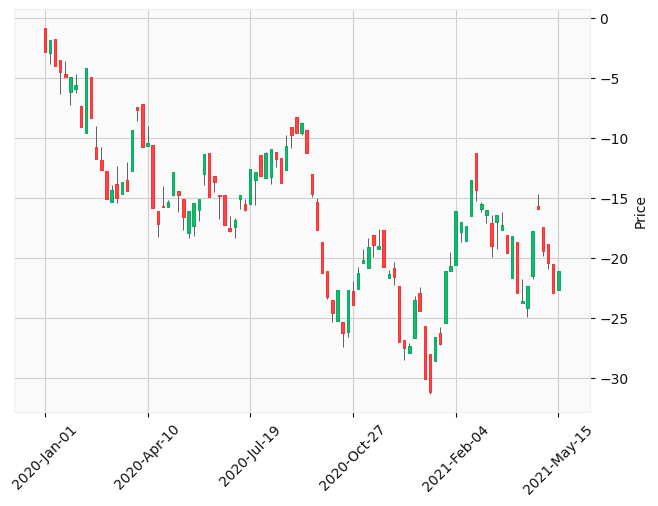

In [6]:
# 用mplfinance繪製K線圖

mpf.plot(
    df_stock0_5,
    type='candle',
    style='yahoo',
    volume=False
)

/var/folders/k0/mjnvdkdj7sn_zbtz76h68xr40000gn/T/ipykernel_27688/509071949.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_df = yf.download("TSLA", start="2020-01-01", end="2022-01-01")
[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

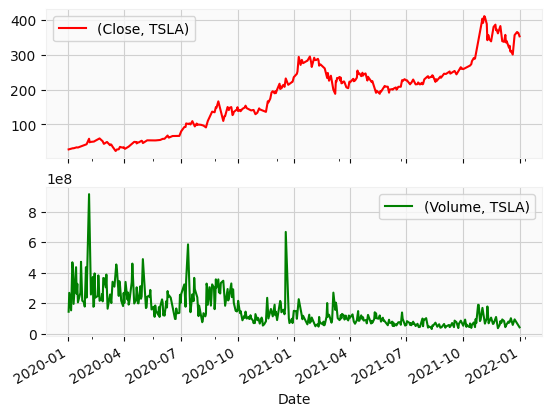

In [7]:
# 抓特斯拉兩年的真實股價來做資料分析範例
tsla_df = yf.download("TSLA", start="2020-01-01", end="2022-01-01")
tsla_df[['Close', 'Volume']].plot(subplots=True, style=['r', 'g'], grid=True)

In [ ]:
# # df一些用法
# # info()：看資料有無缺失
# print(tsla_df.info())

# print("===")

# # describe()：看資料統計量
# print(tsla_df.describe())

# print("===")

# # loc[]：用label選取資料
# print(tsla_df.loc['2020-01-01':'2020-02-01', 'Open'])

# print("===")

# # iloc[]：用index選取資料
# print(tsla_df.iloc[:, 0:2])

# print("===")

# # 資料排序
# print(tsla_df.sort_values(by=('Volume', 'TSLA'), ascending=False))

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2020-01-02   28.684000   28.713333   28.114000   28.299999  142981500
2020-01-03   29.534000   30.266666   29.128000   29.366667  266677500
2020-01-06   30.102667   30.104000   29.333332   29.364668  151995000
2020-01-07   31.270666   31.441999   30.224001   30.760000  268231500
2020-01-08   32.809334   33.232666   31.215334   31.580000  467164500
...                ...         ...         ...         ...        ...
2021-12-27  364.646667  372.333344  356.906677  357.890015   71145900
2021-12-28  362.823334  373.000000  359.473328  369.829987   60324000
2021-12-29  362.063324  368.000000  354.713318  366.213318   56154000
2021-12-30  356.779999  365.183319  351.049988  353.776672   47040900
2021-12-31  352.260010  360.666656  351.529999  357.813324   40733700

[505 rows x 5 colum

In [38]:
# 邏輯條件篩選資料
# 選擇漲跌>8%的資料
# print(tsla_df[(np.abs(tsla_df['Close'].pct_change()) > 0.08)].dropna().head(1))

# 多條件篩選，例如漲跌>8%且成交量大於統計週期平均值的2.5倍
print(tsla_df[(np.abs(tsla_df['Close'].pct_change()) > 0.08) & (tsla_df['Volume'] > tsla_df['Volume'].mean() * 2.5)].dropna().head(1))

Price           Close    High        Low       Open       Volume
Ticker           TSLA    TSLA       TSLA       TSLA         TSLA
Date                                                            
2020-01-13  34.990665  35.042  32.799999  32.900002  397764000.0


In [48]:
# pct_change(): 計算變化百分比、np.round()：四捨五入
print(np.round(tsla_df['Close'].pct_change(), 2))

Ticker      TSLA
Date            
2020-01-02   NaN
2020-01-03  0.03
2020-01-06  0.02
2020-01-07  0.04
2020-01-08  0.05
...          ...
2021-12-27  0.03
2021-12-28 -0.01
2021-12-29 -0.00
2021-12-30 -0.01
2021-12-31 -0.01

[505 rows x 1 columns]


In [49]:
# 將資料存入csv
tsla_df.to_csv("data/tsla_df.csv")

# 讀取csv
tsla_df = pd.read_csv("data/tsla_df.csv", index_col=0, parse_dates=True)
print(tsla_df.head())

                         Close                High                 Low  \
Price                                                                    
Ticker                    TSLA                TSLA                TSLA   
Date                       NaN                 NaN                 NaN   
2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   

                          Open     Volume  
Price                                      
Ticker                    TSLA       TSLA  
Date                       NaN        NaN  
2020-01-02  28.299999237060547  142981500  
2020-01-03  29.366666793823242  266677500  
2020-01-06  29.364667892456055  151995000  


/var/folders/k0/mjnvdkdj7sn_zbtz76h68xr40000gn/T/ipykernel_27688/3857933048.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tsla_df = pd.read_csv("data/tsla_df.csv", index_col=0, parse_dates=True)
